In [0]:
# All extra libraries
!pip install anytree
!pip install pydot
!pip install graphviz
!apt-get install graphviz

  Stored in directory: /root/.cache/pip/wheels/6b/e2/88/ffb3e712f4e961427fd2dab733bf86dcd725d35b659fc18072
Successfully built anytree
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
# All imports
import random
import psutil
import numpy as np
from google.colab import files
from IPython.display import Image
from anytree import NodeMixin, RenderTree, Walker
from anytree.exporter import DotExporter

In [0]:
MAX1 = 7
MAX2 = 5
MIN = 0
class MyNode(NodeMixin):  # Add Node feature
  def __init__(self, i, a, b, parent):
    self.i = i # count of the node
    self.a = a # Jar1 (7L)
    self.b = b # Jar2 (5L) 
    self.parent = parent # parent of this node
    self.name = str(self)
    return
    
  # Print values of node count and values of jars
  def __str__(self):
    text = str(self.i) + ' (' + str(self.a) + ', ' + str(self.b) + ')'
    return text
  
  # Given the node, fetch new states
  # Eliminate states to not to loop or return to start:
  def get_next_states(self): 
    if(self.a==MIN): #if a is empty
      if(self.b==MIN): #if b is also empty
        free = [fill_jar_a(self.a,self.b), fill_jar_b(self.a,self.b)] #you can only fill either one of jars
      elif(self.b<MAX2):
        free = [fill_jar_a(self.a,self.b), transfer_b_to_a(self.a,self.b) ] #else, fill the first jar or transfer from b to a
      else:
        free = [transfer_b_to_a(self.a,self.b) ] #if b is full you can only transfer from b to a
    elif(self.b==MIN): #if b is empty
      if(self.a==MIN): #if a is also empty 
        free = [fill_jar_a(self.a,self.b), fill_jar_b(self.a,self.b)] #you can only fill either of jars
      elif(self.a<MAX1):
        free = [fill_jar_b(self.a,self.b), transfer_a_to_b(self.a,self.b)] #else, fill the first jar or transfer from a to b
      else:  
        free = [transfer_a_to_b(self.a,self.b)] #if a is full you can only transfer from a to b
    elif(self.a==MAX1):
      free = [ (transfer_a_to_b(self.a,self.b)), empty_jar_a(self.a,self.b), empty_jar_b(self.a,self.b) ] #if a is filled, do not fill a
    elif(self.b==MAX2):
      free = [ transfer_b_to_a(self.a,self.b),  empty_jar_a(self.a,self.b), empty_jar_b(self.a,self.b) ] #if b is filled, do not fill b
    else:  #if both are semi filled, any state is plausible since above conditions limits the jars to not to be both full or empty.
      free = [fill_jar_a(self.a,self.b), fill_jar_b(self.a,self.b),
       (transfer_a_to_b(self.a,self.b)), transfer_b_to_a(self.a,self.b),
       empty_jar_a(self.a,self.b), empty_jar_b(self.a,self.b) ]
    return free #return the plausible choices array

In [0]:
# Actions that can be taken:####################################################  
def transfer_a_to_b(a,b):
  d = MAX2 - b
  if (d < a):
    a = a - d
    b = b + d
  else:
    b = b + a
    a = MIN
  return (a,b)

def transfer_b_to_a(a,b):
  c = MAX1 - a
  if (c < b):
    b = b - c
    a = a + c
  else:
    a = a + b
    b = MIN
  return (a,b)

def empty_jar_a(a,b):
    return (MIN,b)

def empty_jar_b(a,b):
    return (a,MIN)

def fill_jar_a(a,b):
    return (MAX1,b)

def fill_jar_b(a,b):
    return (a,MAX2)
################################################################################  

In [0]:
class bfs:
  def __init__(self, goal_size):
    # deep copies the goal matrix
    self.init_node = MyNode(0, 0, 0, parent=None)
    self.goal_size = goal_size
    
  def solve(self):
    parent_node = self.init_node

    self.leaves = []
    notFound = True
    i = 1
    while (notFound and i<100000):
      moves = parent_node.get_next_states()
      # expand
      for m in moves:
        new_node = MyNode(i, m[0], m[1], parent=parent_node)
        self.leaves.append(new_node)
        i += 1
        if m[0] == self.goal_size or m[1] == self.goal_size:
          notFound = False
          print('Found it at ' + str(i-1))
      # update
      parent_node = self.leaves[0]
      self.leaves.remove(parent_node)
    return

  
  def display(self):
    DotExporter(self.init_node).to_picture("solution.png")
    display(Image("solution.png"))
    #files.download('solution.png')

In [0]:
class dfs: ## TODO, I tried, i failed.
  def __init__(self, goal_size):
    # deep copies the goal matrix
    self.init_node = MyNode(0, 0, 0, parent=None)
    self.goal_size = goal_size
    
  def solve(self):
    parent_node = self.init_node # the root node is the (0,0) node
    self.leaves = [] # no leaves at the moment
    notFound = True # not solved
    i = 1 
    while (notFound and i<100000):
      moves = parent_node.get_next_states()
      # expand
      for m in moves:
        if m[0] != parent_node.a and m[1] != parent_node.b:
          new_node = MyNode(i, m[0], m[1], parent=parent_node)
          self.leaves.append(new_node)
          i += 1
          if m[0] == self.goal_size or m[1] == self.goal_size:
            notFound = False
            print('Found it at ' + str(i-1))
          # update
          parent_node = self.leaves[0]
          self.leaves.remove(parent_node)
        else:
          self.solve_again()
    return

  def solve_again(node):
    parent_node = node
    self.leaves = [] # no leaves at the moment
    notFound = True # not solved
    i = 1 
    while (notFound and i<20):
      moves = parent_node.get_next_states()
      # expand
      for m in moves:
        if m[0] != parent_node.a and m[1] != parent_node.b:
          new_node = MyNode(i, m[0], m[1], parent=parent_node)
          self.leaves.append(new_node)
          i += 1
          if m[0] == self.goal_size or m[1] == self.goal_size:
            notFound = False
            print('Found it at ' + str(i-1))
        # update
        parent_node = self.leaves[0]
        self.leaves.remove(parent_node)
    return
    


  
  def display(self):
    DotExporter(self.init_node).to_picture("solution.png")
    display(Image("solution.png"))
    #files.download('solution.png')

In [0]:
# Question 1
df = dfs(1)
df.solve()
df.display()

NameError: ignored

Found it at 14


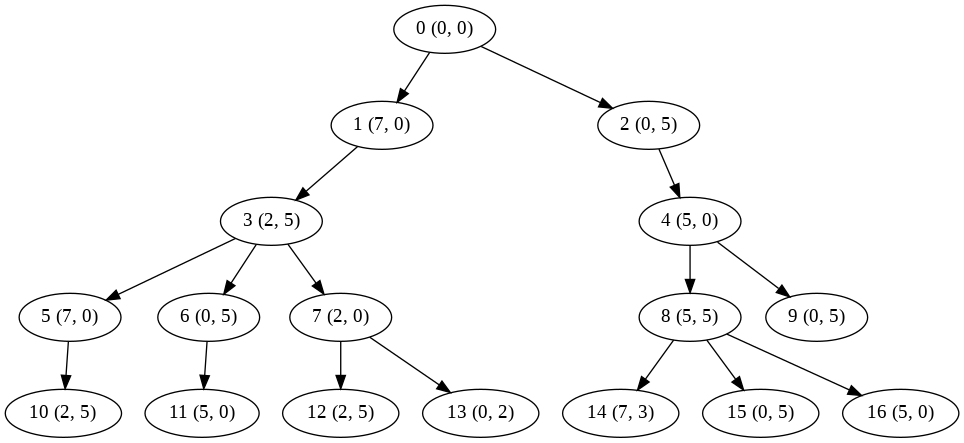

In [0]:
# Question 2
p = bfs(3)
p.solve()
p.display()